# Car Damage Detection

In [ ]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-9a5j0hu_
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-9a5j0hu_
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp311-cp311-linux_x86_64.whl size=395989 sha256=c65c8f8da09e55fc02cb830aacaaf30696d2145530545b44f9d527c3ec1da74a
  Stored in directory: /tmp/pip-ephem-wheel-cache-to_eybdp/wheels/6d/69/75/358c50a37672dfda8d74ba3b30ec49fb75d52f7c081886d503
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.8
    Uninstalling pycocotools-2.0.8:
      Successfully uninstalled pycocotools-2.0.8


In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] =

import os
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

In [ ]:
!unzip Car-Damage.zip

Archive:  Car-Damage.zip
  inflating: img/1.jpg               
  inflating: img/10.jpg              
  inflating: img/13.jpg              
  inflating: img/14.jpg              
  inflating: img/15.jpg              
  inflating: img/16.jpg              
  inflating: img/17.jpg              
  inflating: img/18.jpg              
  inflating: img/19.jpg              
  inflating: img/2.jpg               
  inflating: img/20.jpg              
  inflating: img/21.jpg              
  inflating: img/22.jpg              
  inflating: img/23.jpg              
  inflating: img/24.jpg              
  inflating: img/25.jpg              
  inflating: img/26.jpg              
  inflating: img/27.jpg              
  inflating: img/29.jpg              
  inflating: img/3.jpg               
  inflating: img/30.jpg              
  inflating: img/31.jpg              
  inflating: img/32.jpg              
  inflating: img/33.jpg              
  inflating: img/34.jpg              
  inflating: img/36.jpg  

In [ ]:
dataDir="/content/val"
dataType='COCO_val_annos'
mul_dataType='COCO_mul_val_annos'
annFile='{}/{}.json'.format(dataDir,dataType)
mul_annFile='{}/{}.json'.format(dataDir,mul_dataType)
img_dir = "/content/img"

In [ ]:
coco=COCO(annFile)
mul_coco=COCO(mul_annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories for damages: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories for damages: \n{}\n'.format(', '.join(nms)))

mul_cats = mul_coco.loadCats(mul_coco.getCatIds())
mul_nms=[cat['name'] for cat in mul_cats]
print('COCO categories for parts: \n{}\n'.format(', '.join(mul_nms)))

mul_nms = set([mul_cat['supercategory'] for mul_cat in mul_cats])
print('COCO supercategories for parts: \n{}\n'.format(', '.join(mul_nms)))

COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



In [ ]:
catIds = coco.getCatIds(catNms=['damage']);
imgIds = coco.getImgIds(catIds=catIds );

In [ ]:
random_img_id = random.choice(imgIds)
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))

7 image id was selected at random from the [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


In [ ]:
imgId = coco.getImgIds(imgIds = [random_img_id])
img = coco.loadImgs(imgId)[0]
print("Image details \n",img)

Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '74.jpg', 'flickr_url': '', 'height': 1024, 'id': 7, 'license': 1, 'width': 1024}


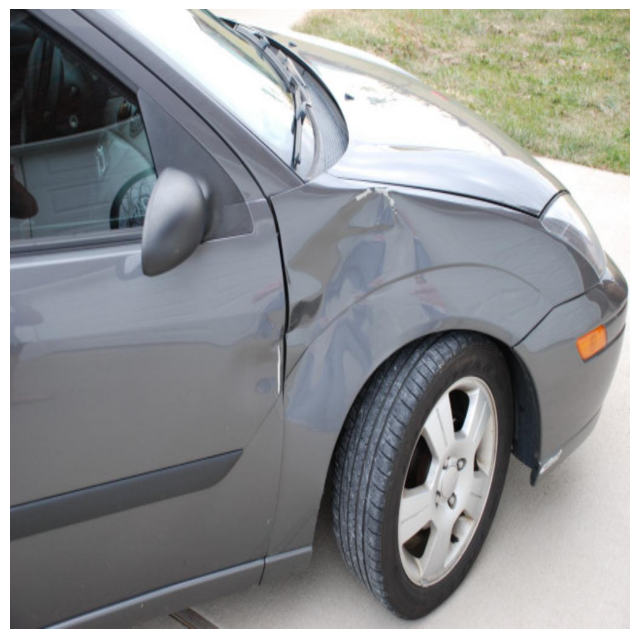

In [ ]:
I = io.imread(img_dir + '/' + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [ ]:
annIds = coco.getAnnIds(imgIds=imgId,iscrowd=None)
anns = coco.loadAnns(annIds)

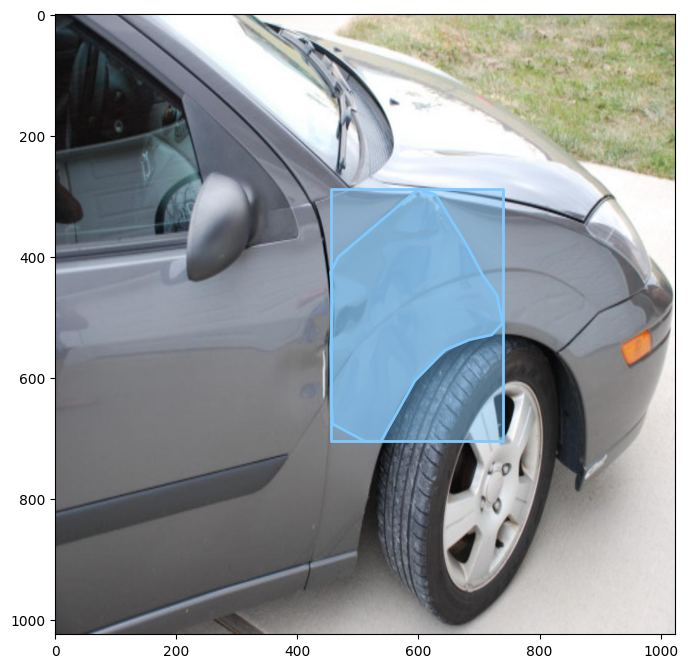

In [ ]:
plt.imshow(I)
plt.axis('on')
coco.showAnns(anns, draw_bbox=True )

In [ ]:
mul_annIds = mul_coco.getAnnIds(imgIds=imgId,iscrowd=None)
mul_anns = mul_coco.loadAnns(mul_annIds)

In [ ]:
category_map = dict()

for ele in list(mul_coco.cats.values()):
    category_map.update({ele['id']:ele['name']})

In [ ]:
category_map

{1: 'headlamp', 2: 'rear_bumper', 3: 'door', 4: 'hood', 5: 'front_bumper'}

Parts are: ['door', 'hood', 'headlamp', 'front_bumper']


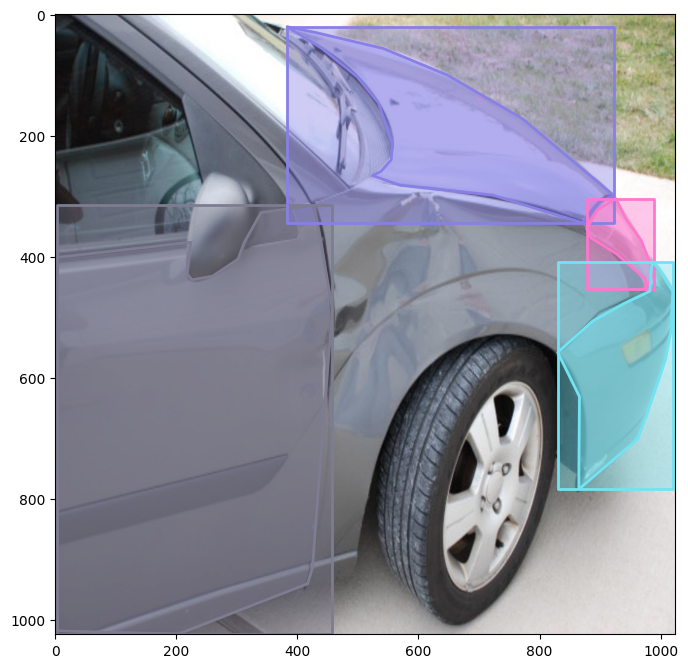

In [ ]:
parts = []
for region in mul_anns:
    parts.append(category_map[region['category_id']])

print("Parts are:", parts)

I = io.imread(img_dir + '/' + img['file_name'])
plt.imshow(I)
plt.axis('on')
mul_coco.showAnns(mul_anns, draw_bbox=True )

### Object detection model using dectectron2

In [ ]:
!pip install -U torch torchvision torchaudio
!pip install git+https://github.com/facebookresearch/detectron2.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

2.6.0+cu124 True


In [ ]:
assert torch.__version__.startswith("2.")

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

plt.rcParams["figure.figsize"] = [16,9]

In [ ]:
!python -m detectron2.utils.collect_env

-------------------------------  -----------------------------------------------------------------
sys.platform                     linux
Python                           3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
numpy                            2.0.2
detectron2                       0.6 @/usr/local/lib/python3.11/dist-packages/detectron2
Compiler                         GCC 11.4
CUDA compiler                    CUDA 12.5
detectron2 arch flags            7.5
DETECTRON2_ENV_MODULE            <not set>
PyTorch                          2.6.0+cu124 @/usr/local/lib/python3.11/dist-packages/torch
PyTorch debug build              False
torch._C._GLIBCXX_USE_CXX11_ABI  False
GPU available                    Yes
GPU 0                            Tesla T4 (arch=7.5)
Driver version                   550.54.15
CUDA_HOME                        /usr/local/cuda
Pillow                           11.1.0
torchvision                      0.21.0+cu124 @/usr/local/lib/python3.11/dist-packages/torchv

In [ ]:
from detectron2.data.datasets import register_coco_instances
import os

dataset_dir = "/content"
img_dir = os.path.join(dataset_dir, "img")
train_json = os.path.join(dataset_dir, "train", "COCO_train_annos.json")
val_json = os.path.join(dataset_dir, "val", "COCO_val_annos.json")

register_coco_instances("car_damage_train", {}, train_json, img_dir)
register_coco_instances("car_damage_val", {}, val_json, img_dir)

In [ ]:
class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
import os
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
dataset_dir = "/content"
img_dir = os.path.join(dataset_dir, "img")
train_json = os.path.join(dataset_dir, "train", "COCO_train_annos.json")
val_json = os.path.join(dataset_dir, "val", "COCO_val_annos.json")

register_coco_instances("car_damage_train", {}, train_json, img_dir)
register_coco_instances("car_damage_val", {}, val_json, img_dir)

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = ("car_damage_train",)
cfg.DATASETS.TEST = ("car_damage_val",)

cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 2000
cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

cfg.OUTPUT_DIR = "/content/detectron2_output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

In [ ]:
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[04/05 14:53:43 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[04/05 14:53:43 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[04/05 14:53:52 d2.utils.events]:  eta: 0:09:53  iter: 19  total_loss: 2.108  loss_cls: 0.7029  loss_box_reg: 0.5103  loss_mask: 0.6928  loss_rpn_cls: 0.1709  loss_rpn_loc: 0.01809    time: 0.2987  last_time: 0.3139  data_time: 0.0236  last_data_time: 0.0050   lr: 4.9953e-06  max_mem: 2114M
[04/05 14:54:06 d2.utils.events]:  eta: 0:09:35  iter: 39  total_loss: 2.001  loss_cls: 0.6575  loss_box_reg: 0.5054  loss_mask: 0.6911  loss_rpn_cls: 0.1878  loss_rpn_loc: 0.01769    time: 0.2987  last_time: 0.3662  data_time: 0.0114  last_data_time: 0.0231   lr: 9.9902e-06  max_mem: 2114M
[04/05 14:54:12 d2.utils.events]:  eta: 0:09:34  iter: 59  total_loss: 2.039  loss_cls: 0.5881  loss_box_reg: 0.5436  loss_mask: 0.6876  loss_rpn_cls: 0.1098  loss_rpn_loc: 0.01922    time: 0.2988  last_time: 0.2579  data_time: 0.0124  last_data_time: 0.0055   lr: 1.4985e-05  max_mem: 2114M
[04/05 14:54:18 d2.utils.events]:  eta: 0:09:23  iter: 79  total_loss: 1.942  loss_cls: 0.5202  loss_box_reg: 0.5251  loss_m

In [ ]:
import cv2
import random
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [ ]:
from detectron2.config import get_cfg
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.WEIGHTS = os.path.join("/content/detectron2_output", "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.DATASETS.TEST = ("car_damage_val", )
predictor = DefaultPredictor(cfg)

[04/05 15:08:09 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/detectron2_output/model_final.pth ...


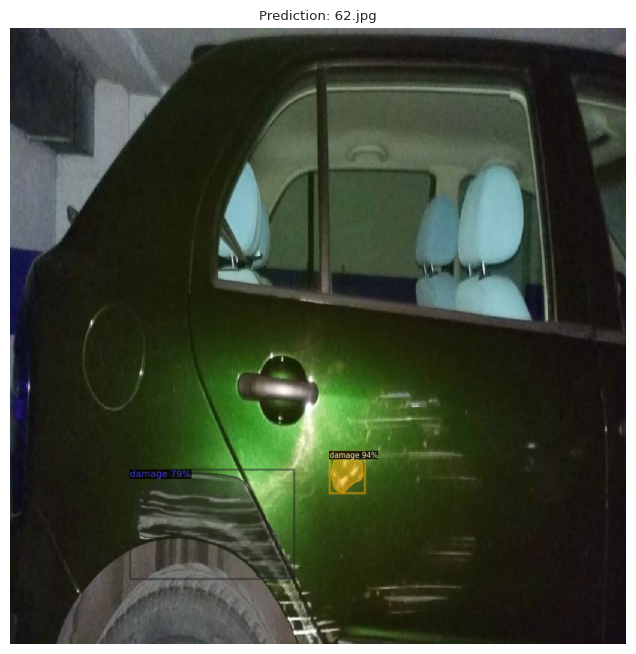

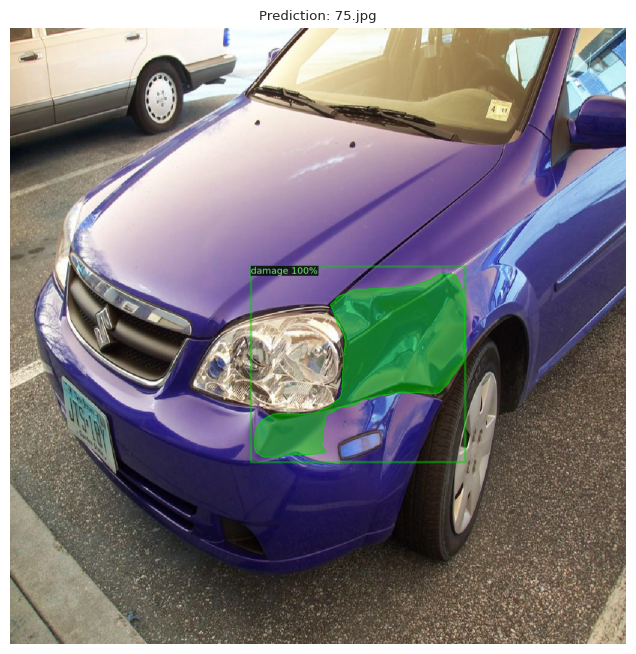

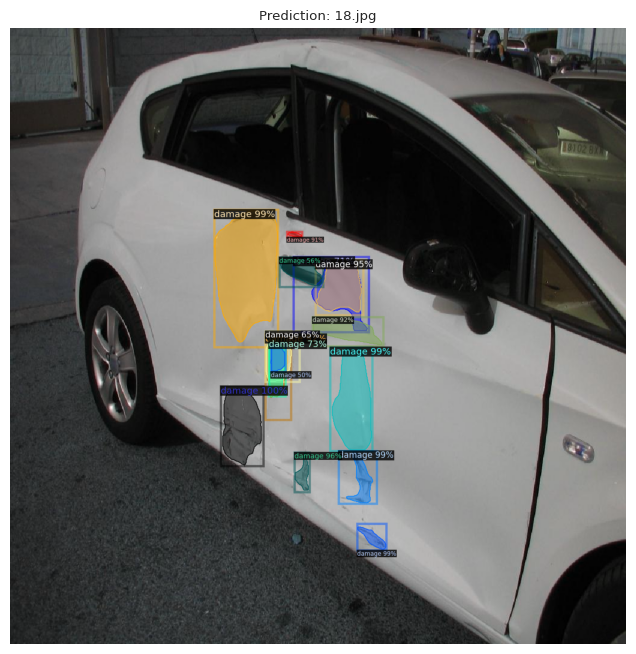

In [ ]:
from matplotlib import pyplot as plt

for image_name in sample_images:
    image_path = os.path.join(image_dir, image_name)
    im = cv2.imread(image_path)
    outputs = predictor(im)

    v = Visualizer(im[:, :, ::-1], metadata=MetadataCatalog.get("car_damage_val"), scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    plt.figure(figsize=(12, 8))
    plt.imshow(out.get_image()[:, :, ::-1])
    plt.title(f"Prediction: {image_name}")
    plt.axis("off")
    plt.show()


[04/05 15:13:52 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/detectron2_output/model_final.pth ...


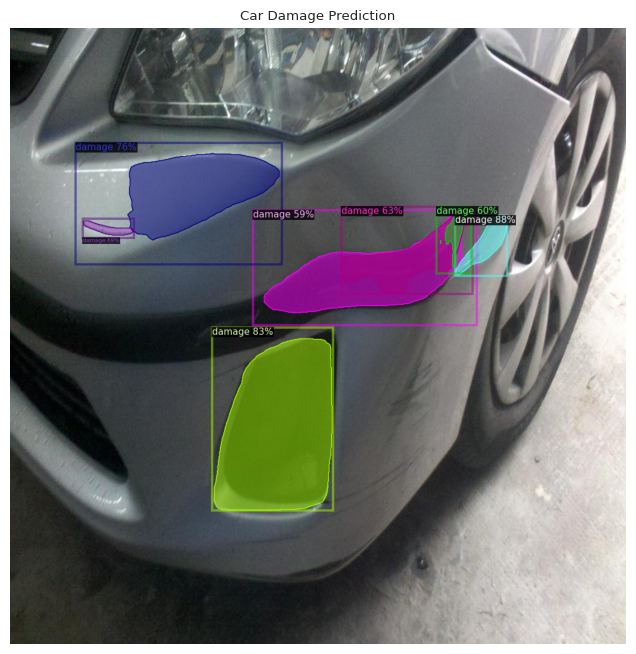

In [ ]:
# Step 1: Imports
import cv2
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.WEIGHTS = "/content/detectron2_output/model_final.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.DATASETS.TEST = ("car_damage_val", )

predictor = DefaultPredictor(cfg)

image_path = "/content/test/45.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

outputs = predictor(image)

v = Visualizer(image, MetadataCatalog.get("car_damage_val"), scale=1.0)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(12, 8))
plt.imshow(out.get_image())
plt.axis("off")
plt.title("Car Damage Prediction")
plt.show()

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 116.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.2 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import torch
import cv2
import numpy as np
from PIL import Image
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Load config and weights
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = "/content/detectron2_output/model_final.pth"  # Your trained model path
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

# Set metadata with class name(s)
MetadataCatalog.get("car_dataset").thing_classes = ["damage"]  # Or ["dent", "scratch"] if you have more
predictor = DefaultPredictor(cfg)

def detect_damage(input_img):
    img_np = np.array(input_img)
    img_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
    outputs = predictor(img_bgr)

    instances = outputs["instances"].to("cpu")
    pred_classes = instances.pred_classes.tolist()
    scores = instances.scores.tolist()

    # Get readable names and scores
    class_names = MetadataCatalog.get("car_dataset").thing_classes
    predictions_info = ""
    for cls_id, score in zip(pred_classes, scores):
        label = class_names[cls_id]
        predictions_info += f"{label}: {score*100:.2f}%\n"

    # Visualize
    v = Visualizer(img_bgr[:, :, ::-1], MetadataCatalog.get("car_dataset"), scale=1.2)
    out = v.draw_instance_predictions(instances)
    result_img = out.get_image()[:, :, ::-1]

    return Image.fromarray(result_img), predictions_info.strip()

# Create Gradio interface
gr.Interface(
    fn=detect_damage,
    inputs=gr.Image(label="Upload Car Image"),
    outputs=[
        gr.Image(label="Detected Damage"),
        gr.Textbox(label="Predictions with Confidence (%)")
    ],
    title="Car Parts Damage Detection System",
    description="Upload an image of a car. The model detects damaged parts and shows their confidence percentages."
).launch()


[04/05 16:12:14 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/detectron2_output/model_final.pth ...
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://71c825f4a19b76011a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import cv2
import torch
import numpy as np
from PIL import Image

# Load your trained model
model = torch.load("C:\\Users\\rites\\Downloads\\model_final.pth")
model.eval()

# COCO class names for car parts (modify according to your dataset)
CLASS_NAMES = [
    'headlamp', 'rear_bumper', 'door', 'hood', 'front_bumper',
    'windshield', 'fender', 'mirror', 'grille', 'wheel'
]

# Estimated repair costs (modify with your actual data)
REPAIR_COSTS = {
    'headlamp': (150, 400),
    'door': (500, 1500),
    'hood': (1000, 3000),
    'front_bumper': (800, 2000),
    'rear_bumper': (600, 1800),
    'windshield': (200, 600),
    'fender': (700, 1500),
    'mirror': (100, 300),
    'grille': (300, 800),
    'wheel': (200, 500)
}

def preprocess_image(image):
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.resize(image, (640, 640))
    image = image.astype(np.float32) / 255.0
    image = torch.tensor(image).permute(2, 0, 1).unsqueeze(0)
    return image

def calculate_severity(damaged_parts):
    num_damaged = len(damaged_parts)
    if num_damaged == 0:
        return "No Damage"
    if num_damaged <= 2:
        return "Low"
    elif 3 <= num_damaged <= 4:
        return "Moderate"
    else:
        return "Severe"

def estimate_repair_cost(damaged_parts):
    min_cost = 0
    max_cost = 0
    for part in damaged_parts:
        if part in REPAIR_COSTS:
            min_cost += REPAIR_COSTS[part][0]
            max_cost += REPAIR_COSTS[part][1]
    return f"₹{min_cost} - ₹{max_cost}"

def predict_damage(image):
    # Preprocess image
    input_tensor = preprocess_image(image)

    # Run inference
    with torch.no_grad():
        outputs = model(input_tensor)

    # Process outputs (modify according to your model's output format)
    damaged_parts = []
    conf_threshold = 0.5

    # Assuming outputs are in standard object detection format
    for detection in outputs[0]:
        score = detection[4]
        if score > conf_threshold:
            class_id = int(detection[5])
            if class_id < len(CLASS_NAMES):
                damaged_parts.append(CLASS_NAMES[class_id])

    # Remove duplicate parts
    damaged_parts = list(set(damaged_parts))

    # Get severity level
    severity = calculate_severity(damaged_parts)

    # Estimate repair cost
    cost_estimate = estimate_repair_cost(damaged_parts)

    # Format damaged parts list
    parts_text = ", ".join(damaged_parts) if damaged_parts else "No damaged parts detected"

    return severity, cost_estimate, parts_text

# Create Gradio interface
inputs = gr.Image(label="Upload Car Image", type="pil")
outputs = [
    gr.Textbox(label="Damage Severity"),
    gr.Textbox(label="Estimated Repair Cost"),
    gr.Textbox(label="Damaged Parts")
]

title = "Car Damage Assessment System"
description = "Upload an image of a damaged car to assess severity, repair cost, and damaged parts"

gr.Interface(
    fn=predict_damage,
    inputs=inputs,
    outputs=outputs,
    title=title,
    description=description,
    examples=[["sample_damage1.jpg"], ["sample_damage2.jpg"]]
).launch()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\rites\\Downloads\\model_final.pth'